In [8]:
%matplotlib inline
import pylab as pl

In [9]:
from astropy.table import Table
from astropy.visualization import simple_norm
import numpy as np

In [10]:
import numpy as np
import matplotlib
import matplotlib.colors

In [11]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [12]:
mist = Table.read(f'{basepath}/isochrones/MIST_iso_633a08f2d8bb1.iso.cmd',
                  header_start=12, data_start=13, format='ascii', delimiter=' ', comment='#')
mist['410M405'] = mist['F410M']
mist['405M410'] = mist['F405N']

In [13]:
distance_modulus = 5*np.log10(8500)-5
distance_modulus

14.647094628571466

In [14]:
mist[:5]

EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],F070W,F090W,F115W,F140M,F150W2,F150W,F162M,F164N,F182M,F187N,F200W,F210M,F212N,F250M,F277W,F300M,F322W2,F323N,F335M,F356W,F360M,F405N,F410M,F430M,F444W,F460M,F466N,F470N,F480M,phase,410M405,405M410
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
23,5.0,0.1549504467031604,0.15495042038352222,3.492262461966795,3.030913225174413,-0.48061022765371253,0.0,0.041798,7.190549,5.239828,4.195428,3.810084,3.600077,3.533576,3.154265,3.041972,3.258998,3.332219,3.207991,3.127633,3.097444,3.311584,3.310175,3.31986,3.100119,2.833528,2.998544,2.8668,2.785964,2.762808,2.692165,2.742963,2.766802,2.847391,2.912116,2.902179,2.851602,-1.0,2.692165,2.762808
24,5.0,0.16090471535689013,0.1609046869992652,3.494601625688686,3.026269963981724,-0.4517319382495324,0.0,0.041798,7.099083,5.164455,4.130184,3.733636,3.526588,3.456224,3.077575,2.965957,3.178968,3.250905,3.130198,3.05173,3.022347,3.241984,3.242039,3.254198,3.034953,2.770175,2.934656,2.803899,2.722999,2.701997,2.631441,2.682677,2.70677,2.78835,2.852927,2.842876,2.792185,-1.0,2.631441,2.701997
25,5.0,0.166893640928868,0.16689361042934317,3.4969338015925633,3.0218133025786247,-0.42298160014247677,0.0,0.041798,7.007471,5.089502,4.065433,3.658015,3.453519,3.379762,3.001642,2.890606,3.099502,3.169953,3.052893,2.97646,2.947819,3.172325,3.173489,3.188001,2.969552,2.706032,2.870607,2.741118,2.660277,2.641523,2.571055,2.622676,2.647039,2.729588,2.794011,2.783838,2.733012,-1.0,2.571055,2.641523
26,5.0,0.17291878111786002,0.172918748369505,3.499259690878638,3.017500107676793,-0.39430938290525047,0.0,0.041798,6.915472,5.014852,4.001112,3.583243,3.380769,3.30423,2.926462,2.815883,3.020557,3.089274,2.976015,2.901804,2.873823,3.102401,3.104475,3.120912,2.903642,2.640663,2.806202,2.678284,2.597655,2.581267,2.510888,2.562829,2.587481,2.670973,2.735233,2.724927,2.673863,-1.0,2.510888,2.581267
27,5.0,0.17897842247122703,0.1789783873650338,3.501579492127857,3.0133506753074393,-0.36573906977649895,0.0,0.041798,6.823016,4.940554,3.937259,3.509533,3.308431,3.229863,2.852233,2.741955,2.942293,3.008978,2.899701,2.827943,2.800524,3.032191,3.034943,3.052804,2.837149,2.573816,2.741348,2.615403,2.535175,2.521287,2.451,2.503183,2.528142,2.612543,2.676633,2.666151,2.614841,-1.0,2.451,2.521287


In [15]:
mist.columns 

<TableColumns names=('EEP','log10_isochrone_age_yr','initial_mass','star_mass','log_Teff','log_g','log_L','[Fe/H]_init','[Fe/H]','F070W','F090W','F115W','F140M','F150W2','F150W','F162M','F164N','F182M','F187N','F200W','F210M','F212N','F250M','F277W','F300M','F322W2','F323N','F335M','F356W','F360M','F405N','F410M','F430M','F444W','F460M','F466N','F470N','F480M','phase','410M405','405M410')>

In [32]:
trilegal = Table.read('/orange/adamginsburg/jwst/brick/isochrones/trilegal_output369051588074.dat', format='ascii.csv', delimiter=' ')
len(trilegal)

1432575

In [33]:
trilegal[:5]

#Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,F070W,F090W,F115W,F150W,F200W,F277W,F356W,F444W,F150W2,F322W2,F140M,F162M,F182M,F210M,F250M,F300M,F335M,F360M,F410M,F430M,F460M,F480M,Mact
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,6.65,-0.41,0.368,-1.649,3.596,4.981,16.0,0.0,0.0,24.893,24.619,23.904,23.386,22.816,22.54,22.555,22.326,22.27,22.904,22.447,22.975,22.598,22.571,22.5,22.573,22.552,22.387,22.279,22.22,22.249,22.331,22.319,0.368
1,6.65,-0.39,0.03124,-2.556,3.421,4.118,16.3,0.001,0.0,27.46,28.869,26.658,25.578,25.208,24.807,24.661,24.049,23.905,25.152,24.345,25.488,24.81,24.934,24.663,24.701,24.602,24.194,23.961,23.843,23.884,23.975,23.957,0.031
1,6.65,-0.37,0.1011,-1.885,3.509,4.308,15.8,0.0,0.0,25.282,25.593,24.31,23.6,23.063,22.759,22.665,22.28,22.174,23.119,22.476,23.23,22.816,22.828,22.675,22.71,22.623,22.377,22.215,22.124,22.152,22.24,22.21,0.101
1,6.65,-0.37,0.033,-2.541,3.424,4.138,16.6,0.001,0.0,27.722,29.082,26.908,25.844,25.47,25.073,24.929,24.325,24.182,25.418,24.618,25.744,25.079,25.199,24.933,24.968,24.87,24.469,24.238,24.12,24.161,24.251,24.233,0.033
1,6.65,-0.33,0.07557,-2.09,3.482,4.28,16.0,0.0,0.0,25.995,26.569,25.043,24.249,23.737,23.437,23.345,22.87,22.761,23.78,23.107,23.934,23.45,23.523,23.331,23.389,23.292,22.984,22.794,22.699,22.737,22.842,22.808,0.076


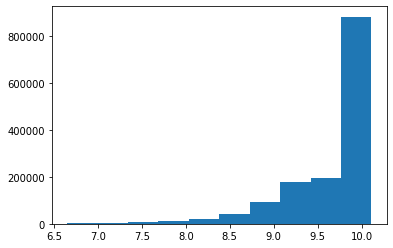

In [35]:
pl.hist(trilegal['logAge']);

## Use Michael Fero's trilegal webscraper

In [24]:
%run /orange/adamginsburg/spam_pioneers/PaschenAlphaModeling/trilegal_webscrapping.py

In [28]:
Trileg = Trilegal()
Trileg.data['gc_b'] = '0'
Trileg.data['photsys_file'] = 'tab_mag_odfnew/tab_mag_jwst_miri_wide.dat'
Trileg.data['photsys_file'] = 'tab_mag_odfnew/tab_mag_jwst_nircam_widemedium_nov22.dat'
Trileg.data['icm_lim'] = '6' # n'th filter number
Trileg.data['mag_lim'] = '26'
Trileg.data['r_sun'] = '8100'
Trileg.data.update({
 'extinction_infty': '30',
})

In [30]:
#trilegal_table_nircam = Trileg.search(gc_b=0, field=0.01, icm_lim=6, mag_lim=26)

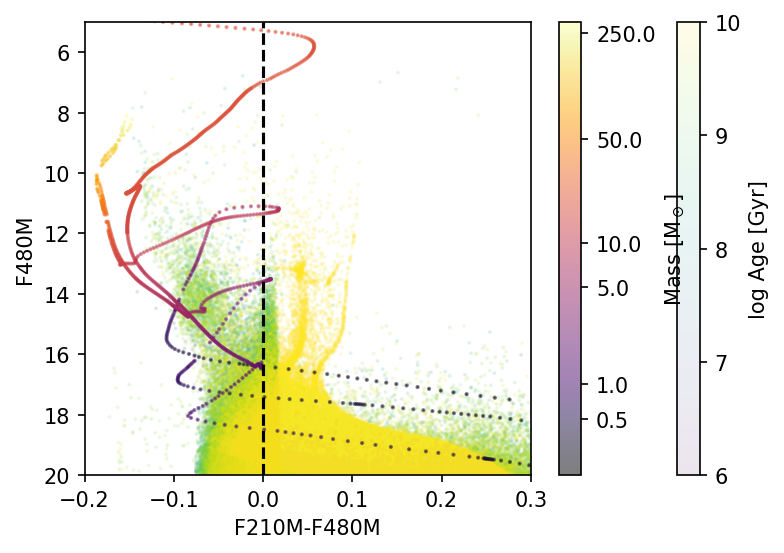

In [51]:
pl.figure(dpi=150)

norm = simple_norm(np.linspace(6,10))
        
sel = trilegal['F480M'] < 20
pl.scatter((trilegal['F210M'] - trilegal['F480M'])[sel],
           trilegal['F480M'][sel],
           c=trilegal['logAge'][sel],
           norm=norm,
           alpha=0.1,
           s=1
          )

cb = pl.colorbar()
cb.set_ticks([6,7,8,9,10])
cb.set_label("log Age [Gyr]")

        
norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    if age in (5,6,7):
    
        agesel = mist['log10_isochrone_age_yr'] == age
        pl.scatter(mist['F210M'][agesel] - mist['F480M'][agesel],
                   (mist['F480M'])[agesel]+distance_modulus,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='inferno',
                   alpha=0.5,
                   s=1,
                  )
        
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass [M$_\odot$]")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
pl.xlabel("F210M-F480M")
pl.ylabel("F480M")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(20,5)
pl.xlim([-0.2, 0.3]);
#agesel.sum()

In [47]:
trilegal.colnames

['#Gc',
 'logAge',
 '[M/H]',
 'm_ini',
 'logL',
 'logTe',
 'logg',
 'm-M0',
 'Av',
 'm2/m1',
 'mbol',
 'F070W',
 'F090W',
 'F115W',
 'F150W',
 'F200W',
 'F277W',
 'F356W',
 'F444W',
 'F150W2',
 'F322W2',
 'F140M',
 'F162M',
 'F182M',
 'F210M',
 'F250M',
 'F300M',
 'F335M',
 'F360M',
 'F410M',
 'F430M',
 'F460M',
 'F480M',
 'Mact']

(array([631666.,      0.,      0.,      0.,      0.,  19603.,      0.,
             0.,      0., 781306.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

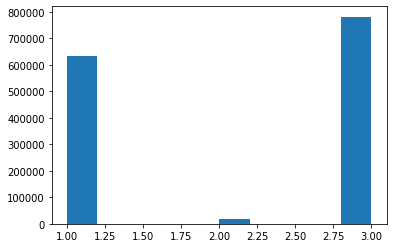

In [48]:
sel = ((trilegal['F210M'] - trilegal['F480M'])>0.08) & (trilegal['F480M']<16)
#pl.hist(trilegal[sel]['m_ini'])
pl.hist(trilegal['#Gc'])

In [49]:
from astroquery.besancon import Besancon